### Importing Pakages and functions from utils.py file

In [9]:
import numpy as np
np.complex_ = np.complex128
np.float_ = np.float64
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px 
import plotly.io as pio
pio.renderers.default = 'iframe'
from IPython.display import display
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt
import sys, os


sys.path.append(os.path.abspath(".."))

# Now imports from src should work
from src.utils import (
    optimize_memory_usage, 
    find_numeric_columns, 
    convert_datetime_columns, 
    clean_and_convert_numeric_columns, 
    contract_size_handler
)


import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Reading one of the csv file

In [10]:
df = pd.read_csv('../data/raw/spy_2020_2022.csv',low_memory=False)
columns = df.columns
columns = [s.replace('[', '').replace(']', '').replace(' ', '').strip().lower() for s in columns]
df.columns = columns
df.sort_values('quote_date', inplace=True)
display(df.head())

,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,dte,c_delta,c_gamma,...,p_last,p_delta,p_gamma,p_vega,p_theta,p_rho,p_iv,p_volume,strike_distance,strike_distance_pct
2455495,1577998800,2020-01-02 16:00,2020-01-02,16.0,324.87,2020-01-03,1578085200,1.00,1.000000,0.000000,...,0.030000,-0.000490,0.000160,0.000570,-0.004760,0.000000,0.962960,,64.9,0.200
2457939,1577998800,2020-01-02 16:00,2020-01-02,16.0,324.87,2020-09-30,1601496000,271.96,0.773830,0.005080,...,7.540000,-0.204710,0.005210,0.794350,-0.030340,-0.547700,0.191490,10.000000,39.9,0.123
2457940,1577998800,2020-01-02 16:00,2020-01-02,16.0,324.87,2020-09-30,1601496000,271.96,0.777810,0.005380,...,0.000000,-0.206300,0.005370,0.798040,-0.029610,-0.550110,0.187410,,38.9,0.120
2457941,1577998800,2020-01-02 16:00,2020-01-02,16.0,324.87,2020-09-30,1601496000,271.96,0.766030,0.005250,...,0.000000,-0.211360,0.005550,0.809760,-0.029390,-0.563710,0.186130,,37.9,0.117
2457942,1577998800,2020-01-02 16:00,2020-01-02,16.0,324.87,2020-09-30,1601496000,271.96,0.761030,0.005380,...,0.000000,-0.216600,0.005620,0.820420,-0.030250,-0.578030,0.185070,,36.9,0.113


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3589079 entries, 2455495 to 972357
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   quote_unixtime       int64  
 1   quote_readtime       object 
 2   quote_date           object 
 3   quote_time_hours     float64
 4   underlying_last      float64
 5   expire_date          object 
 6   expire_unix          int64  
 7   dte                  float64
 8   c_delta              object 
 9   c_gamma              object 
 10  c_vega               object 
 11  c_theta              object 
 12  c_rho                object 
 13  c_iv                 object 
 14  c_volume             object 
 15  c_last               object 
 16  c_size               object 
 17  c_bid                object 
 18  c_ask                object 
 19  strike               float64
 20  p_bid                object 
 21  p_ask                object 
 22  p_size               object 
 23  p_last               object 
 24

In [12]:
df.describe()

,quote_unixtime,quote_time_hours,underlying_last,expire_unix,dte,strike,strike_distance,strike_distance_pct
count,3.589079e+06,3589079.0,3.589079e+06,3.589079e+06,3.589079e+06,3.589079e+06,3.589079e+06,3.589079e+06
mean,1.625102e+09,16.0,3.867732e+02,1.638526e+09,1.553685e+02,3.673370e+02,6.990646e+01,1.822063e-01
std,2.662208e+07,0.0,5.610069e+01,3.118598e+07,2.022561e+02,1.084168e+02,6.846897e+01,1.743915e-01
min,1.577999e+09,16.0,2.222100e+02,1.578085e+09,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00
25%,1.602187e+09,16.0,3.426500e+02,1.613768e+09,1.900000e+01,3.000000e+02,2.140000e+01,5.600000e-02
50%,1.625688e+09,16.0,3.934800e+02,1.639775e+09,6.404000e+01,3.680000e+02,4.760000e+01,1.250000e-01
75%,1.647461e+09,16.0,4.341600e+02,1.660939e+09,2.200400e+02,4.350000e+02,9.970000e+01,2.630000e-01
max,1.672434e+09,16.0,4.777700e+02,1.766178e+09,1.096000e+03,4.898000e+03,4.469300e+03,1.042500e+01


In [13]:
df.isna().sum()

quote_unixtime         0
quote_readtime         0
quote_date             0
quote_time_hours       0
underlying_last        0
expire_date            0
expire_unix            0
dte                    0
c_delta                0
c_gamma                0
c_vega                 0
c_theta                0
c_rho                  0
c_iv                   0
c_volume               0
c_last                 0
c_size                 0
c_bid                  0
c_ask                  0
strike                 0
p_bid                  0
p_ask                  0
p_size                 0
p_last                 0
p_delta                0
p_gamma                0
p_vega                 0
p_theta                0
p_rho                  0
p_iv                   0
p_volume               0
strike_distance        0
strike_distance_pct    0
dtype: int64

In [14]:
df['c_size']

2455495       333 x 333
2457939       500 x 500
2457940        10 x 500
2457941       500 x 500
2457942       500 x 945
               ...     
972635       756 x 5777
972636       648 x 6230
972637       395 x 6122
972625      3375 x 1637
972357      2165 x 1204
Name: c_size, Length: 3589079, dtype: object

### Getting the total number of shares in a contract

In [15]:
df['c_size'] = df['c_size'].apply(contract_size_handler)
df['p_size'] = df['p_size'].apply(contract_size_handler)

### Converting all datetime columns

In [16]:
for col in df.columns:
    if 'quote' in col or 'date' in col or 'unix' in col:
        continue
    df[col] = df[col].astype(str).str.strip()
    try:
        df[col][df[col].astype('str').str.strip() == '']=np.nan
        if df[col].str.contains('.').any():
          df[col] = df[col].astype(float)
    except:
        print(col)
df = convert_datetime_columns(df)

In [17]:
print(df)

         quote_unixtime      quote_readtime quote_date  quote_time_hours  \
2455495      1577998800 2020-01-02 16:00:00 2020-01-02              16.0   
2457939      1577998800 2020-01-02 16:00:00 2020-01-02              16.0   
2457940      1577998800 2020-01-02 16:00:00 2020-01-02              16.0   
2457941      1577998800 2020-01-02 16:00:00 2020-01-02              16.0   
2457942      1577998800 2020-01-02 16:00:00 2020-01-02              16.0   
...                 ...                 ...        ...               ...   
972635       1672434000 2022-12-30 16:00:00 2022-12-30              16.0   
972636       1672434000 2022-12-30 16:00:00 2022-12-30              16.0   
972637       1672434000 2022-12-30 16:00:00 2022-12-30              16.0   
972625       1672434000 2022-12-30 16:00:00 2022-12-30              16.0   
972357       1672434000 2022-12-30 16:00:00 2022-12-30              16.0   

         underlying_last expire_date  expire_unix     dte  c_delta  c_gamma  \
2455495 

### Optimizing Memory

In [18]:
df = optimize_memory_usage(df)
display(df.head())

Initial memory usage: 931.00 MB
Final memory usage: 520.27 MB
Reduced by: 410.74 MB (44.12%)


,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,dte,c_delta,c_gamma,...,p_last,p_delta,p_gamma,p_vega,p_theta,p_rho,p_iv,p_volume,strike_distance,strike_distance_pct
2455495,1577998800,2020-01-02 16:00:00,2020-01-02,16.0,324.869995,2020-01-03,1578085200,1.000000,1.00000,0.00000,...,0.03,-0.00049,0.00016,0.00057,-0.00476,0.00000,0.96296,NaN,64.900002,0.200
2457939,1577998800,2020-01-02 16:00:00,2020-01-02,16.0,324.869995,2020-09-30,1601496000,271.959991,0.77383,0.00508,...,7.54,-0.20471,0.00521,0.79435,-0.03034,-0.54770,0.19149,10.0,39.900002,0.123
2457940,1577998800,2020-01-02 16:00:00,2020-01-02,16.0,324.869995,2020-09-30,1601496000,271.959991,0.77781,0.00538,...,0.00,-0.20630,0.00537,0.79804,-0.02961,-0.55011,0.18741,NaN,38.900002,0.120
2457941,1577998800,2020-01-02 16:00:00,2020-01-02,16.0,324.869995,2020-09-30,1601496000,271.959991,0.76603,0.00525,...,0.00,-0.21136,0.00555,0.80976,-0.02939,-0.56371,0.18613,NaN,37.900002,0.117
2457942,1577998800,2020-01-02 16:00:00,2020-01-02,16.0,324.869995,2020-09-30,1601496000,271.959991,0.76103,0.00538,...,0.00,-0.21660,0.00562,0.82042,-0.03025,-0.57803,0.18507,NaN,36.900002,0.113


### Checking the number of null values in columns

In [19]:
df.isnull().sum()


quote_unixtime              0
quote_readtime              0
quote_date                  0
quote_time_hours            0
underlying_last             0
expire_date                 0
expire_unix                 0
dte                         0
c_delta                   224
c_gamma                   224
c_vega                    224
c_theta                   224
c_rho                     224
c_iv                   214642
c_volume               720222
c_last                   1296
c_size                      0
c_bid                    1296
c_ask                    1296
strike                      0
p_bid                    1294
p_ask                    1294
p_size                      0
p_last                   1294
p_delta                   224
p_gamma                   224
p_vega                    224
p_theta                   224
p_rho                     224
p_iv                   172804
p_volume               745547
strike_distance             0
strike_distance_pct         0
dtype: int

### Checking the first row 

In [20]:
df.iloc[0]

quote_unixtime                  1577998800
quote_readtime         2020-01-02 16:00:00
quote_date             2020-01-02 00:00:00
quote_time_hours                      16.0
underlying_last                 324.869995
expire_date            2020-01-03 00:00:00
expire_unix                     1578085200
dte                                    1.0
c_delta                                1.0
c_gamma                                0.0
c_vega                                 0.0
c_theta                           -0.00041
c_rho                              0.01423
c_iv                                   NaN
c_volume                               1.0
c_last                               53.48
c_size                            110889.0
c_bid                            64.559998
c_ask                            64.760002
strike                               260.0
p_bid                                  0.0
p_ask                                  0.0
p_size                                 0.0
p_last     

### Checking nan values in c_iv and p_iv

In [21]:
# Check number of NaNs in c_iv and p_iv
num_nan_c_iv = df['c_iv'].isna().sum()
num_nan_p_iv = df['p_iv'].isna().sum()

print(f"Number of NaNs in c_iv: {num_nan_c_iv}")
print(f"Number of NaNs in p_iv: {num_nan_p_iv}")

Number of NaNs in c_iv: 214642
Number of NaNs in p_iv: 172804


In [22]:
print(df.iloc[0].to_dict())

{'quote_unixtime': 1577998800, 'quote_readtime': Timestamp('2020-01-02 16:00:00'), 'quote_date': Timestamp('2020-01-02 00:00:00'), 'quote_time_hours': 16.0, 'underlying_last': 324.8699951171875, 'expire_date': Timestamp('2020-01-03 00:00:00'), 'expire_unix': 1578085200, 'dte': 1.0, 'c_delta': 1.0, 'c_gamma': 0.0, 'c_vega': 0.0, 'c_theta': -0.00041000000783242285, 'c_rho': 0.014229999855160713, 'c_iv': nan, 'c_volume': 1.0, 'c_last': 53.47999954223633, 'c_size': 110889.0, 'c_bid': 64.55999755859375, 'c_ask': 64.76000213623047, 'strike': 260.0, 'p_bid': 0.0, 'p_ask': 0.0, 'p_size': 0.0, 'p_last': 0.029999999329447746, 'p_delta': -0.0004900000058114529, 'p_gamma': 0.00015999999595806003, 'p_vega': 0.0005699999746866524, 'p_theta': -0.0047599999234080315, 'p_rho': 0.0, 'p_iv': 0.9629600048065186, 'p_volume': nan, 'strike_distance': 64.9000015258789, 'strike_distance_pct': 0.20000000298023224}


In [23]:
df.columns

Index(['quote_unixtime', 'quote_readtime', 'quote_date', 'quote_time_hours',
       'underlying_last', 'expire_date', 'expire_unix', 'dte', 'c_delta',
       'c_gamma', 'c_vega', 'c_theta', 'c_rho', 'c_iv', 'c_volume', 'c_last',
       'c_size', 'c_bid', 'c_ask', 'strike', 'p_bid', 'p_ask', 'p_size',
       'p_last', 'p_delta', 'p_gamma', 'p_vega', 'p_theta', 'p_rho', 'p_iv',
       'p_volume', 'strike_distance', 'strike_distance_pct'],
      dtype='object')

## Understnading the nan values for iv

In [26]:
count_le_0 = (df['c_iv'] < 0).sum()       # strictly less than 0
count_eq_0 = (df['c_iv'] == 0).sum()      # exactly equal to 0
count_gt_3 = (df['c_iv'] > 3).sum()       # strictly greater than 3
count = (df['c_iv']).sum() - count_le_0 - count_eq_0 - count_gt_3

print("< 0:", count_le_0 + count_eq_0)   # if you want combined <= 0
print("= 0 :", count_eq_0)
print("> 3 :", count_gt_3)
print("Rest :", count)

< 0: 16268
= 0 : 394
> 3 : 15449
Rest : 1130570.875


In [27]:
count_le_0 = (df['p_iv'] < 0).sum()       # strictly less than 0
count_eq_0 = (df['p_iv'] == 0).sum()      # exactly equal to 0
count_gt_3 = (df['p_iv'] > 3).sum()       # strictly greater than 3
count = (df['p_iv']).sum() - count_le_0 - count_eq_0 - count_gt_3

print("< 0:", count_le_0 + count_eq_0)   # if you want combined <= 0
print("= 0 :", count_eq_0)
print("> 3 :", count_gt_3)
print("Rest :", count)

< 0: 28564
= 0 : 975
> 3 : 5655
Rest : 1094458.125


### Checking the second Row

In [28]:
df.iloc[1]

quote_unixtime                  1577998800
quote_readtime         2020-01-02 16:00:00
quote_date             2020-01-02 00:00:00
quote_time_hours                      16.0
underlying_last                 324.869995
expire_date            2020-09-30 00:00:00
expire_unix                     1601496000
dte                             271.959991
c_delta                            0.77383
c_gamma                            0.00508
c_vega                             0.82511
c_theta                           -0.02796
c_rho                              1.13143
c_iv                               0.22234
c_volume                               2.0
c_last                           35.830002
c_size                            250000.0
c_bid                                46.59
c_ask                                46.84
strike                               285.0
p_bid                                 6.07
p_ask                                 7.42
p_size                               290.0
p_last     

In [29]:
both_c_iv_and_c_volume_nan = (df['c_iv'].isnull() & df['c_volume'].isnull()).sum()
both_p_iv_and_p_volume_nan = (df['p_iv'].isnull() & df['p_volume'].isnull()).sum()

print(f"Number of rows where both c_iv and c_volume are NaN: {both_c_iv_and_c_volume_nan}")
print(f"Number of rows where both p_iv and p_volume are NaN: {both_p_iv_and_p_volume_nan}")

Number of rows where both c_iv and c_volume are NaN: 97408
Number of rows where both p_iv and p_volume are NaN: 92772


In [30]:
df = df.fillna(0)

In [31]:
df.isnull().sum()


quote_unixtime         0
quote_readtime         0
quote_date             0
quote_time_hours       0
underlying_last        0
expire_date            0
expire_unix            0
dte                    0
c_delta                0
c_gamma                0
c_vega                 0
c_theta                0
c_rho                  0
c_iv                   0
c_volume               0
c_last                 0
c_size                 0
c_bid                  0
c_ask                  0
strike                 0
p_bid                  0
p_ask                  0
p_size                 0
p_last                 0
p_delta                0
p_gamma                0
p_vega                 0
p_theta                0
p_rho                  0
p_iv                   0
p_volume               0
strike_distance        0
strike_distance_pct    0
dtype: int64

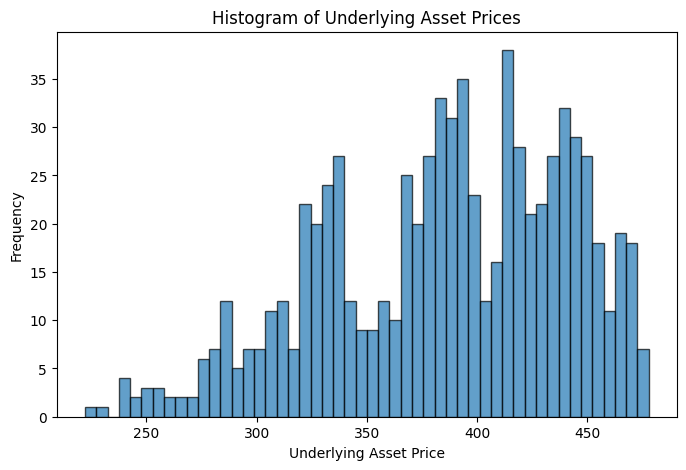

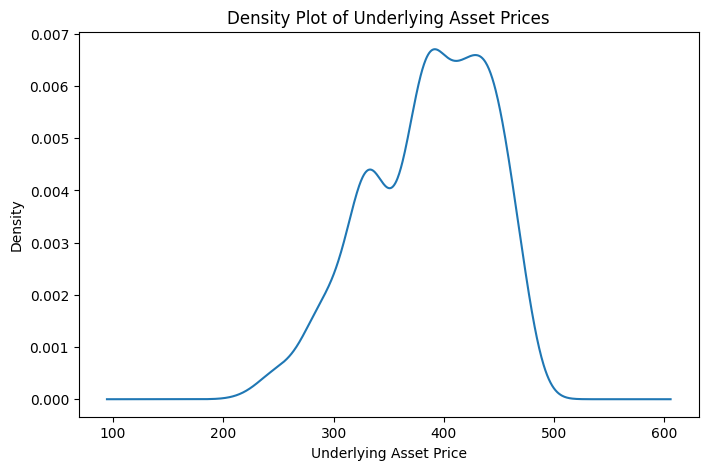

In [32]:

underlying_prices = df.groupby('quote_date')['underlying_last'].agg('last')

plt.figure(figsize=(8,5))
plt.hist(underlying_prices, bins=50, edgecolor='black', alpha=0.7)
plt.title('Histogram of Underlying Asset Prices')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Frequency')
plt.show()

# Density plot (KDE)
underlying_prices.plot(kind='kde', figsize=(8,5))
plt.title('Density Plot of Underlying Asset Prices')
plt.xlabel('Underlying Asset Price')
plt.ylabel('Density')
plt.show()


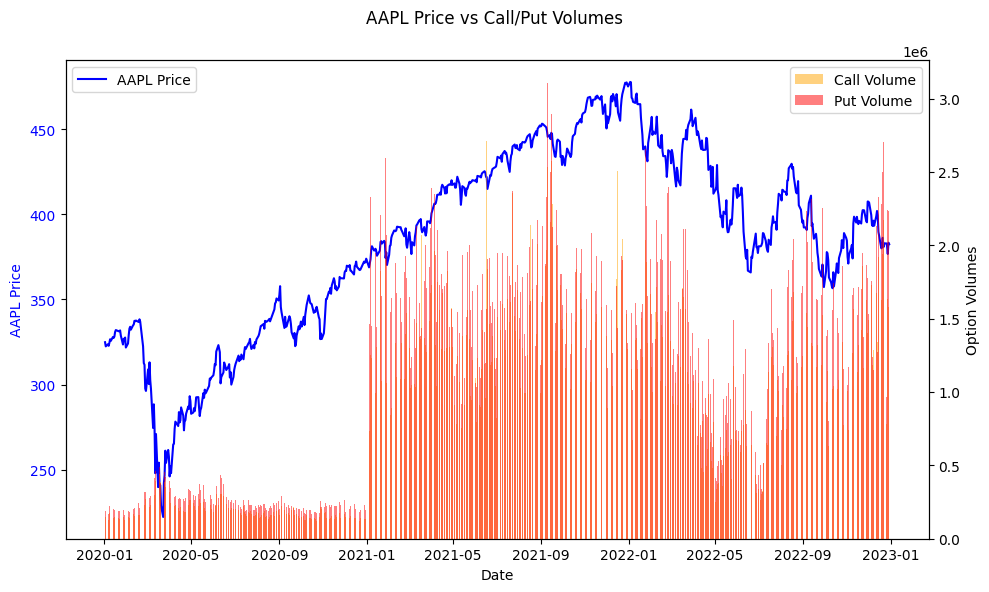

In [33]:

underlying_prices = df.groupby('quote_date')['underlying_last'].agg('last')
call_put_volumes = df.groupby('quote_date')[['c_volume','p_volume']].sum().reset_index()

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot line for underlying price
ax1.plot(underlying_prices.index, underlying_prices, color='blue', label='AAPL Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("AAPL Price", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second y-axis for volumes
ax2 = ax1.twinx()
ax2.bar(call_put_volumes['quote_date'], call_put_volumes['c_volume'], 
        color='orange', alpha=0.5, label='Call Volume')
ax2.bar(call_put_volumes['quote_date'], call_put_volumes['p_volume'], 
        color='red', alpha=0.5, label='Put Volume')
ax2.set_ylabel("Option Volumes", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Add title & legends
fig.suptitle("AAPL Price vs Call/Put Volumes")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


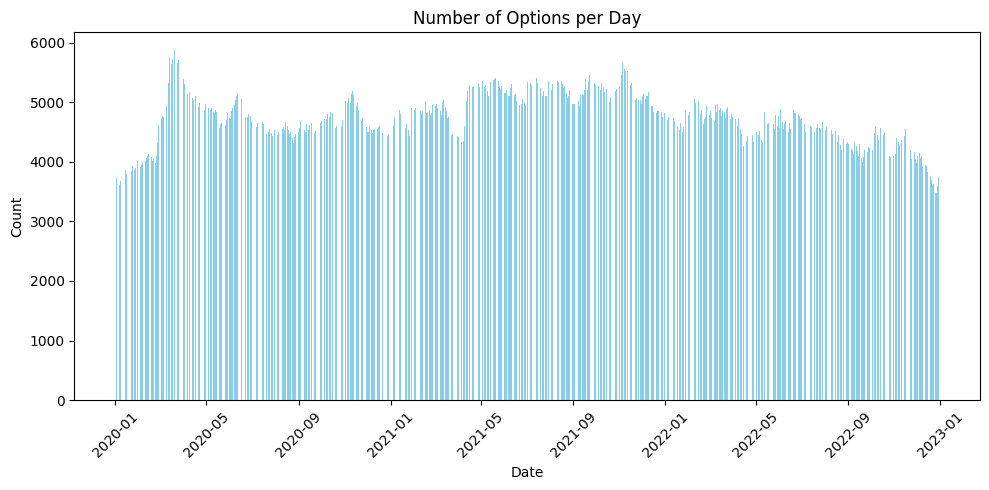

In [34]:

daily_counts = df.groupby('quote_date').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,5))
plt.bar(daily_counts['quote_date'], daily_counts['count'], color='skyblue')
plt.title("Number of Options per Day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
df['strike_distance'] = df['underlying_last'] - df['strike']
df['strike_distance_pct'] =  df['strike_distance'] / df['underlying_last'] 
df['itm'] = 1 - df['strike']/df['underlying_last']
df['cc_rate_bid'] = (df['strike'] / (df['underlying_last'] - df['c_bid']) ) ** (365 / df['dte']) - 1
df['cc_rate_ask'] = (df['strike'] / (df['underlying_last'] - df['c_ask']) ) ** (365 / df['dte']) - 1
df['cc_rate_last'] = (df['strike'] / (df['underlying_last'] - df['c_last']) ) ** (365 / df['dte']) - 1

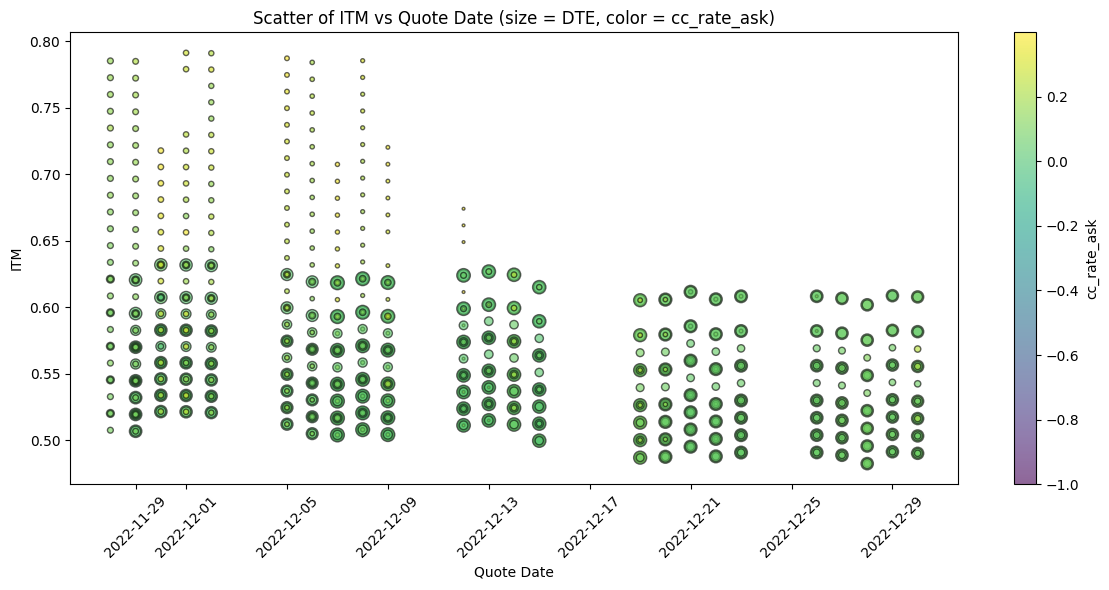

In [36]:

df_filtered = df.iloc[-90000:][
    (df['strike'] > 70) &
    (df['dte'] < 100) &
    (df['strike'] < 200) &
    (df['cc_rate_ask'] < 0.4)
]

# Scatter plot
plt.figure(figsize=(12,6))
scatter = plt.scatter(
    df_filtered['quote_date'],
    df_filtered['itm'],
    s=df_filtered['dte'],          # size mapped to dte
    c=df_filtered['cc_rate_ask'],  # color mapped to cc_rate_ask
    cmap='viridis',
    alpha=0.6,
    edgecolor='k'
)

plt.title("Scatter of ITM vs Quote Date (size = DTE, color = cc_rate_ask)")
plt.xlabel("Quote Date")
plt.ylabel("ITM")
plt.xticks(rotation=45)

# Add colorbar for cc_rate_ask
cbar = plt.colorbar(scatter)
cbar.set_label("cc_rate_ask")

plt.tight_layout()
plt.show()


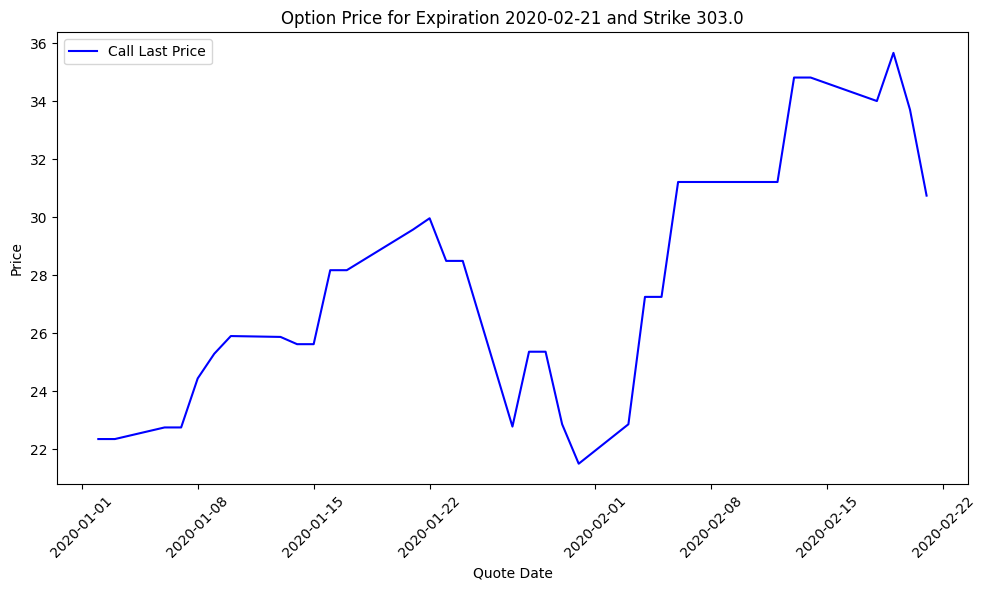

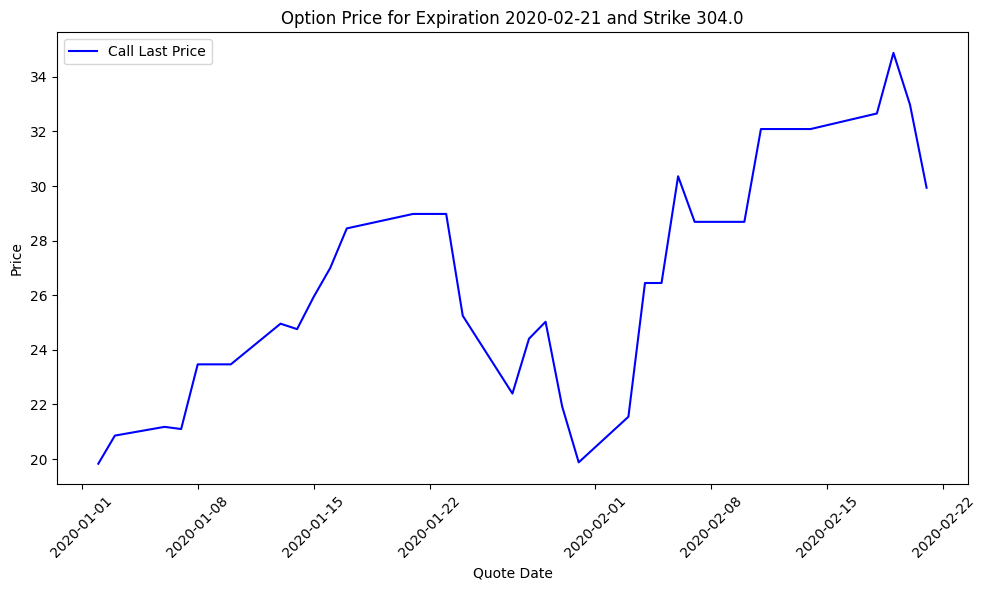

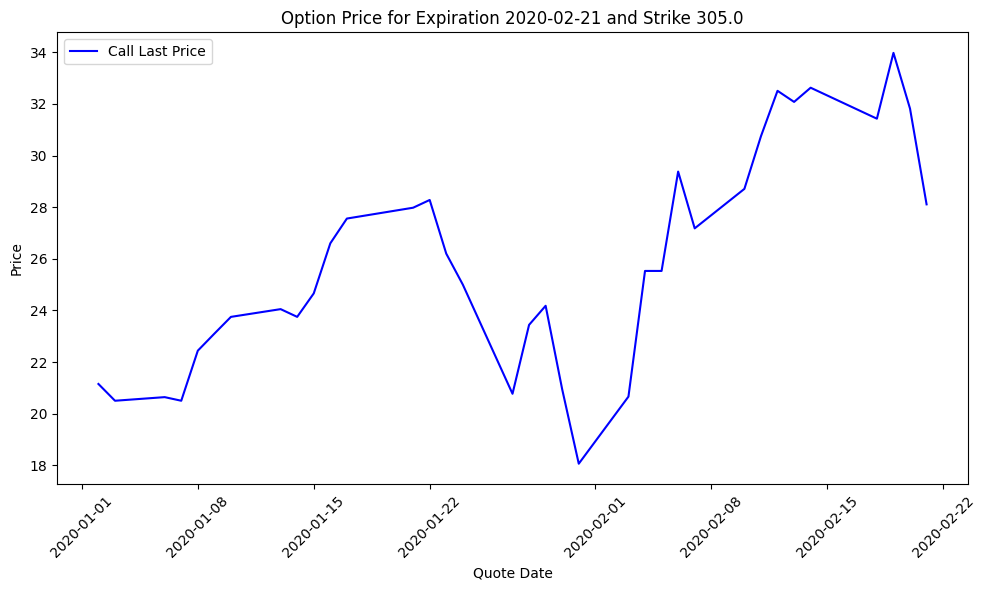

In [37]:

grouped = df.groupby(['expire_date', 'strike'])

count = 0
for (expiration, strike), group in grouped:
    if count < 2000:
        count += 1
        continue
    
    plt.figure(figsize=(10,6))
    plt.plot(group['quote_date'], group['c_last'], label='Call Last Price', color='blue')

    plt.title(f"Option Price for Expiration {expiration.date()} and Strike {strike}")
    plt.xlabel("Quote Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    count += 1
    if count == 2003:   # stop after 3 plots
        break


In [38]:
df[(df['itm'] > .2) & (df['cc_rate_ask'] > .1) &( df['c_volume']>10) &(df['dte'] > 20) &(df['cc_rate_last'] <0.5)].sort_values('cc_rate_ask',ascending=False).tail(10)

,quote_unixtime,quote_readtime,quote_date,quote_time_hours,underlying_last,expire_date,expire_unix,dte,c_delta,c_gamma,...,p_theta,p_rho,p_iv,p_volume,strike_distance,strike_distance_pct,itm,cc_rate_bid,cc_rate_ask,cc_rate_last
606875,1598904000,2020-08-31 16:00:00,2020-08-31,16.0,349.369995,2020-10-16,1602878400,46.000000,0.85740,0.00002,...,-0.00435,-0.00026,0.97601,101.0,224.369995,0.642213,0.642213,0.033631,0.100532,-0.876747
606874,1598904000,2020-08-31 16:00:00,2020-08-31,16.0,349.369995,2020-10-16,1602878400,46.000000,0.85508,0.00004,...,-0.00301,-0.00083,0.98388,6.0,229.369995,0.656525,0.656525,0.018034,0.100532,-0.987970
3586024,1614373200,2021-02-26 16:00:00,2021-02-26,16.0,380.359985,2021-03-31,1617220800,32.959999,0.90720,0.00193,...,-0.05491,-0.01212,0.42762,1.0,79.359985,0.208644,0.208644,0.046005,0.100430,0.153651
1246941,1587585600,2020-04-22 16:00:00,2020-04-22,16.0,279.040009,2020-06-30,1593547200,69.000000,0.87053,0.00276,...,-0.08543,-0.06636,0.51047,131.0,62.040009,0.222334,0.222334,0.079620,0.100415,-0.388174
1201466,1586376000,2020-04-08 16:00:00,2020-04-08,16.0,274.000000,2020-06-19,1592596800,72.000000,0.87010,0.00275,...,-0.08478,-0.06939,0.51866,123.0,62.000000,0.226277,0.226277,0.080941,0.100306,-0.143941
1247678,1587585600,2020-04-22 16:00:00,2020-04-22,16.0,279.040009,2020-09-30,1601496000,161.000000,0.82179,0.00282,...,-0.06597,-0.24607,0.44649,2.0,61.040009,0.218750,0.218750,0.067941,0.100299,-0.281282
2024089,1584648000,2020-03-19 16:00:00,2020-03-19,16.0,240.940002,2020-10-16,1602878400,211.000000,0.84321,0.00174,...,-0.05982,-0.24681,0.60490,144.0,80.940002,0.335934,0.335934,0.064165,0.100288,0.116953
1352840,1608757200,2020-12-23 16:00:00,2020-12-23,16.0,367.570007,2021-01-15,1610744400,23.000000,0.84606,0.00000,...,-0.00152,0.00000,1.47041,100.0,267.570007,0.727943,0.727943,0.032277,0.100215,0.215067
1196736,1586289600,2020-04-07 16:00:00,2020-04-07,16.0,265.179993,2020-07-17,1595016000,101.000000,0.85461,0.00265,...,-0.07323,-0.10621,0.50650,3.0,64.179993,0.242024,0.242024,0.080094,0.100167,0.018004
3035100,1637096400,2021-11-16 16:00:00,2021-11-16,16.0,469.170013,2021-12-17,1639774800,31.000000,0.85048,-0.00003,...,-0.00136,0.00000,1.13647,110.0,324.170013,0.690944,0.690944,-0.086615,0.100087,-0.816900


In [39]:
sub_df = df.groupby(['expire_date','strike'])[['cc_rate_bid' , 'cc_rate_ask' ,'cc_rate_last', 'itm','underlying_last']].agg({'cc_rate_bid': 'mean', 
                                                                                                           'cc_rate_ask' : 'mean','cc_rate_last' : 'mean',
                                                                                                           'itm' : 'median' , 'underlying_last':'mean'}).reset_index()

In [40]:
sub_df

,expire_date,strike,cc_rate_bid,cc_rate_ask,cc_rate_last,itm,underlying_last
0,2020-01-03,260.0,-0.176348,inf,-1.000000,0.196652,323.649994
1,2020-01-03,265.0,-0.203640,inf,-1.000000,0.181203,323.649994
2,2020-01-03,270.0,-0.696683,inf,-1.000000,0.165754,323.649994
3,2020-01-03,272.5,-0.695293,inf,-1.000000,0.158029,323.649994
4,2020-01-03,275.0,-0.697950,inf,-0.999971,0.150305,323.649994
...,...,...,...,...,...,...,...
74284,2025-12-19,630.0,0.182851,0.192852,0.185285,-0.645405,382.885010
74285,2025-12-19,635.0,0.186494,0.194210,0.185431,-0.658464,382.885010
74286,2025-12-19,640.0,0.189627,0.197364,0.188561,-0.671522,382.885010
74287,2025-12-19,645.0,0.192262,0.202327,0.193964,-0.684581,382.885010


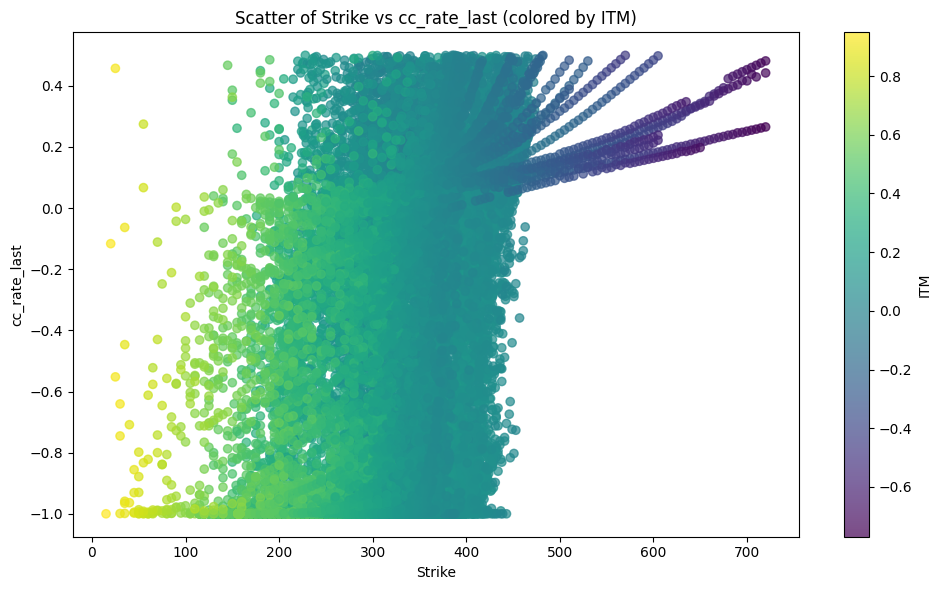

In [41]:
filtered = sub_df[sub_df['cc_rate_last'] < 0.5]

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    filtered['strike'], 
    filtered['cc_rate_last'], 
    c=filtered['itm'], 
    cmap='viridis', 
    alpha=0.7
)

plt.title("Scatter of Strike vs cc_rate_last (colored by ITM)")
plt.xlabel("Strike")
plt.ylabel("cc_rate_last")
plt.colorbar(scatter, label="ITM")
plt.tight_layout()
plt.show()

In [42]:

def black_scholes(S, K, T, r, sigma, option_type='call'):
    """
    Calculate the Black-Scholes price for a European call or put option.

    Parameters:
    S : float : Stock price
    K : float : Strike price
    T : float : Time to maturity (in years)
    r : float : Risk-free interest rate (annual rate)
    sigma : float : Volatility of the underlying stock (annual standard deviation)
    option_type : str : 'call' or 'put'

    Returns:
    price : float : Price of the option
    """
    try:
        d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
        d2 = d1 - sigma * math.sqrt(T)
    except: return np.nan
    if option_type == 'call':
        try:
            price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
        except: price=np.nan
    elif option_type == 'put':
        try:
            price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
        except:price=np.nan
    return price

In [43]:
NUM_EPOCHS = 50 
BATCH_SIZE = 256

In [45]:
df.columns

Index(['quote_unixtime', 'quote_readtime', 'quote_date', 'quote_time_hours',
       'underlying_last', 'expire_date', 'expire_unix', 'dte', 'c_delta',
       'c_gamma', 'c_vega', 'c_theta', 'c_rho', 'c_iv', 'c_volume', 'c_last',
       'c_size', 'c_bid', 'c_ask', 'strike', 'p_bid', 'p_ask', 'p_size',
       'p_last', 'p_delta', 'p_gamma', 'p_vega', 'p_theta', 'p_rho', 'p_iv',
       'p_volume', 'strike_distance', 'strike_distance_pct', 'itm',
       'cc_rate_bid', 'cc_rate_ask', 'cc_rate_last'],
      dtype='object')

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
call_df = df[df['c_volume'] > 0].copy()





# Define input features and target variable
input_features = ['underlying_last', 'dte', 'strike','c_delta','c_gamma','c_theta', 'c_rho', 'c_vega','c_iv','c_volume','p_delta','p_gamma','p_theta', 'p_rho', 'p_vega','p_iv','p_volume','itm'] 
target = 'c_last'



len_call_df = len(call_df)
call_train = call_df[:int(len_call_df*0.8)]
call_test = call_df[int(len_call_df*0.8):]


len_call_df_train = len(call_train)
call_train_final = call_train[:int(len_call_df_train*0.8)]
call_validate =call_train[int(len_call_df_train*0.8):]


scaler_x = MinMaxScaler()  
scaler_y = MinMaxScaler()  

X_train = scaler_x.fit_transform(call_train_final[input_features]) 
y_train = scaler_y.fit_transform(call_train_final[[target]])  
X_val = scaler_x.transform(call_validate[input_features])
y_val = scaler_y.transform(call_validate[[target]]) 
X_test = scaler_x.transform(call_test[input_features])  
y_test = scaler_y.transform(call_test[[target]])

# Reshape data for LSTM input [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  
X_val = X_val.reshape((X_val.shape[0], 1, X_val.shape[1])) 
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))  

print(f"call_train_final: {len(call_train_final)} rows (64% of total)") 
print(f"call_validate: {len(call_validate)} rows (16% of total)")  
print(f"call_test: {len(call_test)} rows (20% of total)")
print()
print(f"X_train shape: {X_train.shape}") 
print(f"X_val shape: {X_val.shape}")  
print(f"X_test shape: {X_test.shape}") 
print()
print(f"y_train shape: {y_train.shape}")  
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}") 

call_train_final: 1299025 rows (64% of total)
call_validate: 324757 rows (16% of total)
call_test: 405946 rows (20% of total)

X_train shape: (1299025, 1, 18)
X_val shape: (324757, 1, 18)
X_test shape: (405946, 1, 18)

y_train shape: (1299025, 1)
y_val shape: (324757, 1)
y_test shape: (405946, 1)


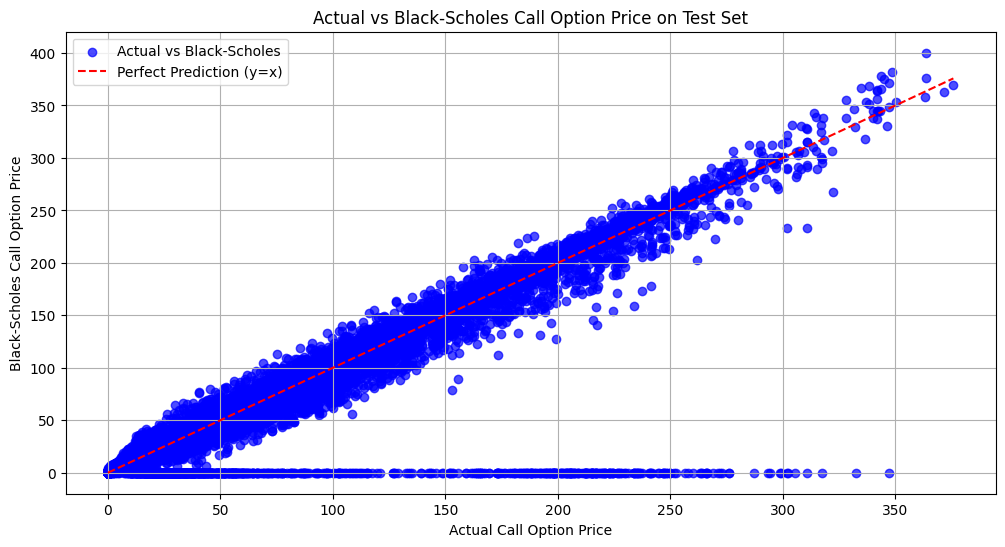

Mean Squared Error (MSE) between actual and BS call price: 37.9360
Mean Absolute Error (MAE) between actual and BS call price: 1.1745
Root Mean Squared Error (RMSE) between actual and BS call price: 6.1592


In [48]:
rf_rate= .0234
call_test['bs_call_price'] = call_test.apply(
    lambda row: black_scholes(
        S=row['underlying_last'], 
        K=row['strike'], 
        T=row['dte'] / 365, 
        r=rf_rate, 
        sigma=row['c_iv'] , 
        option_type='call'
    ), 
    axis=1
)

### Call
plt.figure(figsize=(12, 6))
plt.scatter(call_test['c_last'], call_test['bs_call_price'], alpha=0.7, color='blue', label='Actual vs Black-Scholes')
plt.plot([min(call_test['c_last']), max(call_test['c_last'])], [min(call_test['c_last']), max(call_test['c_last'])], 'r--', label='Perfect Prediction (y=x)'
)
plt.title('Actual vs Black-Scholes Call Option Price on Test Set')
plt.xlabel('Actual Call Option Price')
plt.ylabel('Black-Scholes Call Option Price')
plt.legend()
plt.grid(True)
plt.show()


def calculate_errors(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    mae = np.mean(np.abs(actual - predicted))
    rmse = np.sqrt(mse)
    return mse, mae, rmse

bsm_mse_call, bsm_mae_call, bsm_rmse_call = calculate_errors(call_test['c_last'], call_test['bs_call_price'])

print(f"Mean Squared Error (MSE) between actual and BS call price: {bsm_mse_call:.4f}")
print(f"Mean Absolute Error (MAE) between actual and BS call price: {bsm_mae_call:.4f}")
print(f"Root Mean Squared Error (RMSE) between actual and BS call price: {bsm_rmse_call:.4f}")

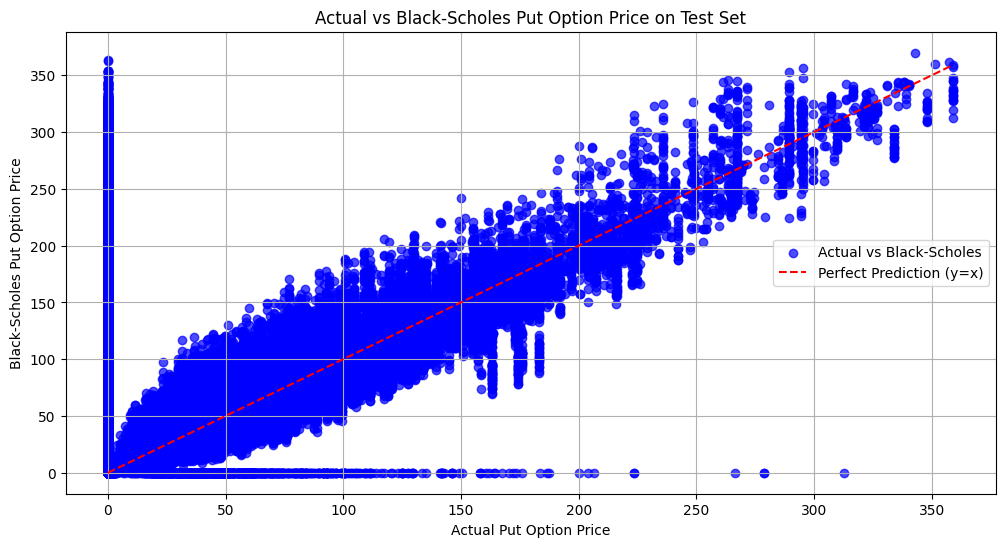

Mean Squared Error (MSE) between actual and BS put price: 1097.8370
Mean Absolute Error (MAE) between actual and BS put price: 12.1415
Root Mean Squared Error (RMSE) between actual and BS put price: 33.1336


In [49]:
rf_rate= .0234
call_test['bs_put_price'] = call_test.apply(
    lambda row: black_scholes(
        S=row['underlying_last'], 
        K=row['strike'], 
        T=row['dte'] / 365, 
        r=rf_rate, 
        sigma=row['p_iv'] , 
        option_type='put'
    ), 
    axis=1
)

### Put
plt.figure(figsize=(12, 6))
plt.scatter(call_test['p_last'], call_test['bs_put_price'], alpha=0.7, color='blue', label='Actual vs Black-Scholes')
plt.plot([min(call_test['p_last']), max(call_test['p_last'])], [min(call_test['p_last']), max(call_test['p_last'])], 'r--', label='Perfect Prediction (y=x)'
)
plt.title('Actual vs Black-Scholes Put Option Price on Test Set')
plt.xlabel('Actual Put Option Price')
plt.ylabel('Black-Scholes Put Option Price')
plt.legend()
plt.grid(True)
plt.show()


def calculate_errors(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    mae = np.mean(np.abs(actual - predicted))
    rmse = np.sqrt(mse)
    return mse, mae, rmse

bsm_mse_put, bsm_mae_put, bsm_rmse_put = calculate_errors(call_test['p_last'], call_test['bs_put_price'])

print(f"Mean Squared Error (MSE) between actual and BS put price: {bsm_mse_put:.4f}")
print(f"Mean Absolute Error (MAE) between actual and BS put price: {bsm_mae_put:.4f}")
print(f"Root Mean Squared Error (RMSE) between actual and BS put price: {bsm_rmse_put:.4f}")

2025-08-28 19:31:06.395690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
5071/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0013Epoch 1:
  Train MSE: 74.4199, MAE: 4.2250, RMSE: 8.6267
  Val MSE: 50.8076, MAE: 3.9952, RMSE: 7.1279
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 131s 25ms/step - loss: 0.0013 - val_loss: 2.9616e-04
Epoch 2/50
5070/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4777e-04Epoch 2:
  Train MSE: 82.7042, MAE: 5.2488, RMSE: 9.0942
  Val MSE: 48.6536, MAE: 4.1602, RMSE: 6.9752
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 119s 24ms/step - loss: 4.4776e-04 - val_loss: 2.8361e-04
Epoch 3/50
5071/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.3476e-04Epoch 3:
  Train MSE: 73.7941, MAE: 4.1983, RMSE: 8.5903
  Val MSE: 64.5875, MAE: 4.4380, RMSE: 8.0366
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 160s 31ms/step - loss: 4.3475e-04 - val_loss: 3.7649e-04
Epoch 4/50
5074/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2517e-04Epoch 4:
  Train MSE: 69.9180, MAE: 4.0406, RMSE: 8.3617
  Val MSE: 47.5524, MAE: 3.8198, RMSE: 6.8958
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 137s 27ms

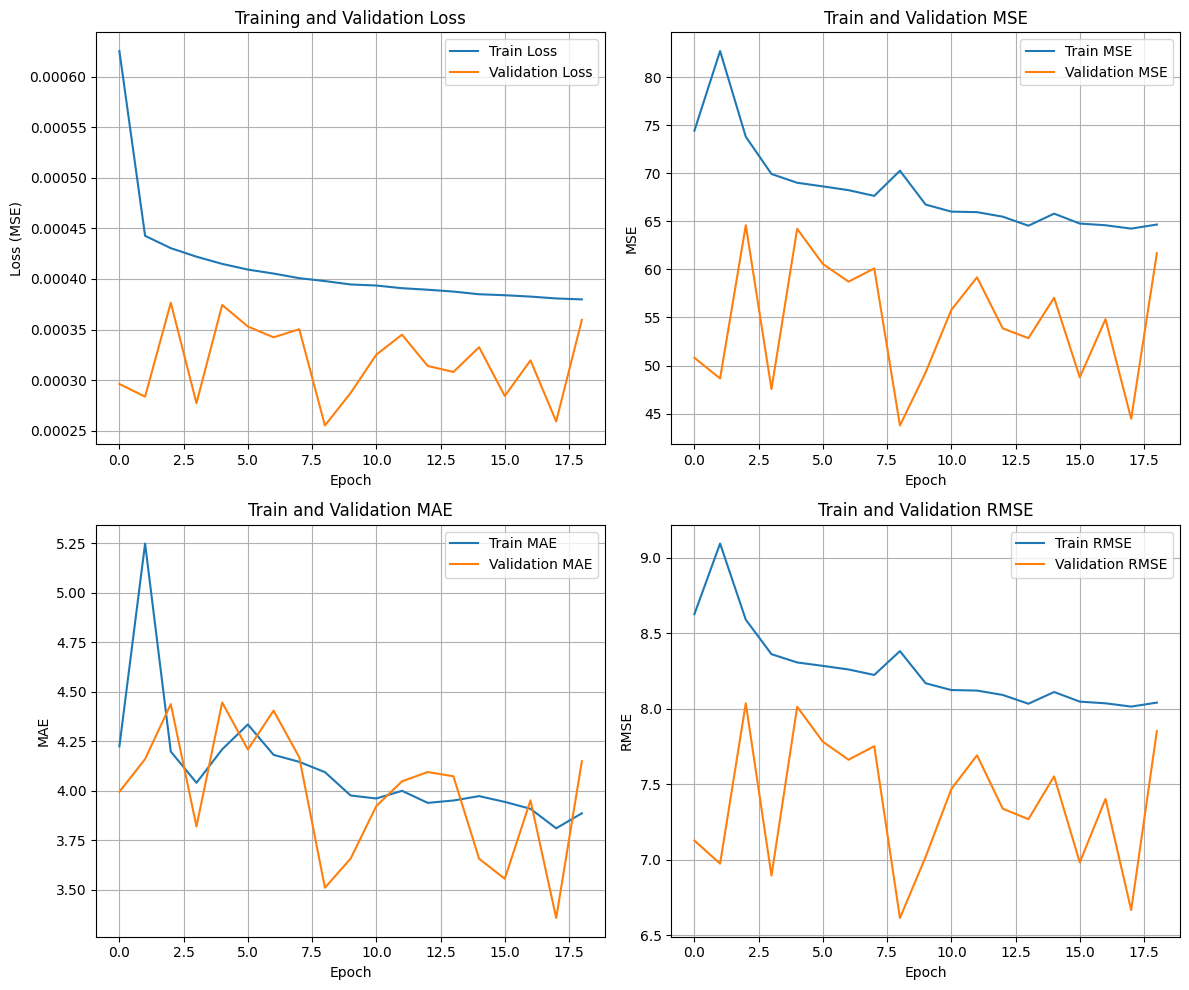

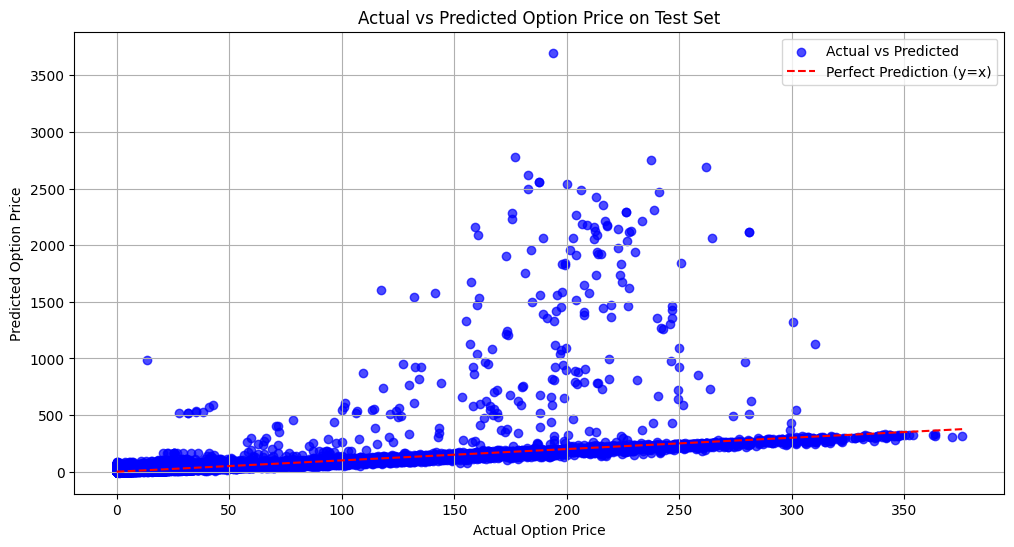

In [50]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Custom callback to track metrics
class MetricsCallback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val, scaler_y):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.scaler_y = scaler_y
        self.train_mse = []
        self.train_mae = []
        self.train_rmse = []
        self.val_mse = []
        self.val_mae = []
        self.val_rmse = []

    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(self.X_train, verbose=0)
        y_val_pred = self.model.predict(self.X_val, verbose=0)

        y_train_true = self.scaler_y.inverse_transform(self.y_train)
        y_train_pred = self.scaler_y.inverse_transform(y_train_pred)
        y_val_true = self.scaler_y.inverse_transform(self.y_val)
        y_val_pred = self.scaler_y.inverse_transform(y_val_pred)

        train_mse = mean_squared_error(y_train_true, y_train_pred)
        train_mae = mean_absolute_error(y_train_true, y_train_pred)
        train_rmse = np.sqrt(train_mse)

        val_mse = mean_squared_error(y_val_true, y_val_pred)
        val_mae = mean_absolute_error(y_val_true, y_val_pred)
        val_rmse = np.sqrt(val_mse)

        self.train_mse.append(train_mse)
        self.train_mae.append(train_mae)
        self.train_rmse.append(train_rmse)
        self.val_mse.append(val_mse)
        self.val_mae.append(val_mae)
        self.val_rmse.append(val_rmse)

        print(f'Epoch {epoch+1}:')
        print(f'  Train MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}')
        print(f'  Val MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, RMSE: {val_rmse:.4f}')

# Build LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile with RMSE loss
model.compile(optimizer='adam', loss='mse')  # Using MSE as loss, since RMSE is sqrt(MSE)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
metrics_callback = MetricsCallback(X_train, y_train, X_val, y_val, scaler_y)

# Train model
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), callbacks=[early_stop, metrics_callback], verbose=1)

# Evaluate on test set
y_pred = model.predict(X_test)

y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

lstm_mse_call = mean_squared_error(y_test_inv, y_pred_inv)
lstm_mae_call = mean_absolute_error(y_test_inv, y_pred_inv)
lstm_rmse_call = np.sqrt(lstm_mse_call)

print(f'MSE on test set: {lstm_mse_call:.4f}')
print(f'MAE on test set: {lstm_mae_call:.4f}')
print(f'RMSE on test set: {lstm_rmse_call:.4f}')

# Save model weights
model.save_weights('lstm_call_price_model.weights.h5')

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Training and Validation Loss
axs[0, 0].plot(history.history['loss'], label='Train Loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss (MSE)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Subplot 2: MSE over Epochs
axs[0, 1].plot(metrics_callback.train_mse, label='Train MSE')
axs[0, 1].plot(metrics_callback.val_mse, label='Validation MSE')
axs[0, 1].set_title('Train and Validation MSE')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Subplot 3: MAE over Epochs
axs[1, 0].plot(metrics_callback.train_mae, label='Train MAE')
axs[1, 0].plot(metrics_callback.val_mae, label='Validation MAE')
axs[1, 0].set_title('Train and Validation MAE')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Subplot 4: RMSE over Epochs
axs[1, 1].plot(metrics_callback.train_rmse, label='Train RMSE')
axs[1, 1].plot(metrics_callback.val_rmse, label='Validation RMSE')
axs[1, 1].set_title('Train and Validation RMSE')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.7, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], 'r--', label='Perfect Prediction (y=x)')
plt.title('Actual vs Predicted Option Price on Test Set')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.legend()
plt.grid(True)
plt.show()

Epoch 1/50
5074/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0010Epoch 1:
  Train MSE: 82.5186, MAE: 4.9013, RMSE: 9.0840
  Val MSE: 43.4860, MAE: 3.5886, RMSE: 6.5944
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 110s 21ms/step - loss: 0.0010 - val_loss: 2.5348e-04
Epoch 2/50
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.4644e-04Epoch 2:
  Train MSE: 71.9803, MAE: 4.3728, RMSE: 8.4841
  Val MSE: 80.9071, MAE: 5.2968, RMSE: 8.9948
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 114s 22ms/step - loss: 4.4644e-04 - val_loss: 4.7161e-04
Epoch 3/50
5069/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.2850e-04Epoch 3:
  Train MSE: 70.5191, MAE: 4.2918, RMSE: 8.3976
  Val MSE: 72.3471, MAE: 4.6739, RMSE: 8.5057
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 106s 21ms/step - loss: 4.2850e-04 - val_loss: 4.2172e-04
Epoch 4/50
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.1610e-04Epoch 4:
  Train MSE: 70.4173, MAE: 4.0498, RMSE: 8.3915
  Val MSE: 52.6411, MAE: 4.0162, RMSE: 7.2554
5075/5075 ━━━━━━━━━━━━━━━━━━━━ 105s 21ms/st

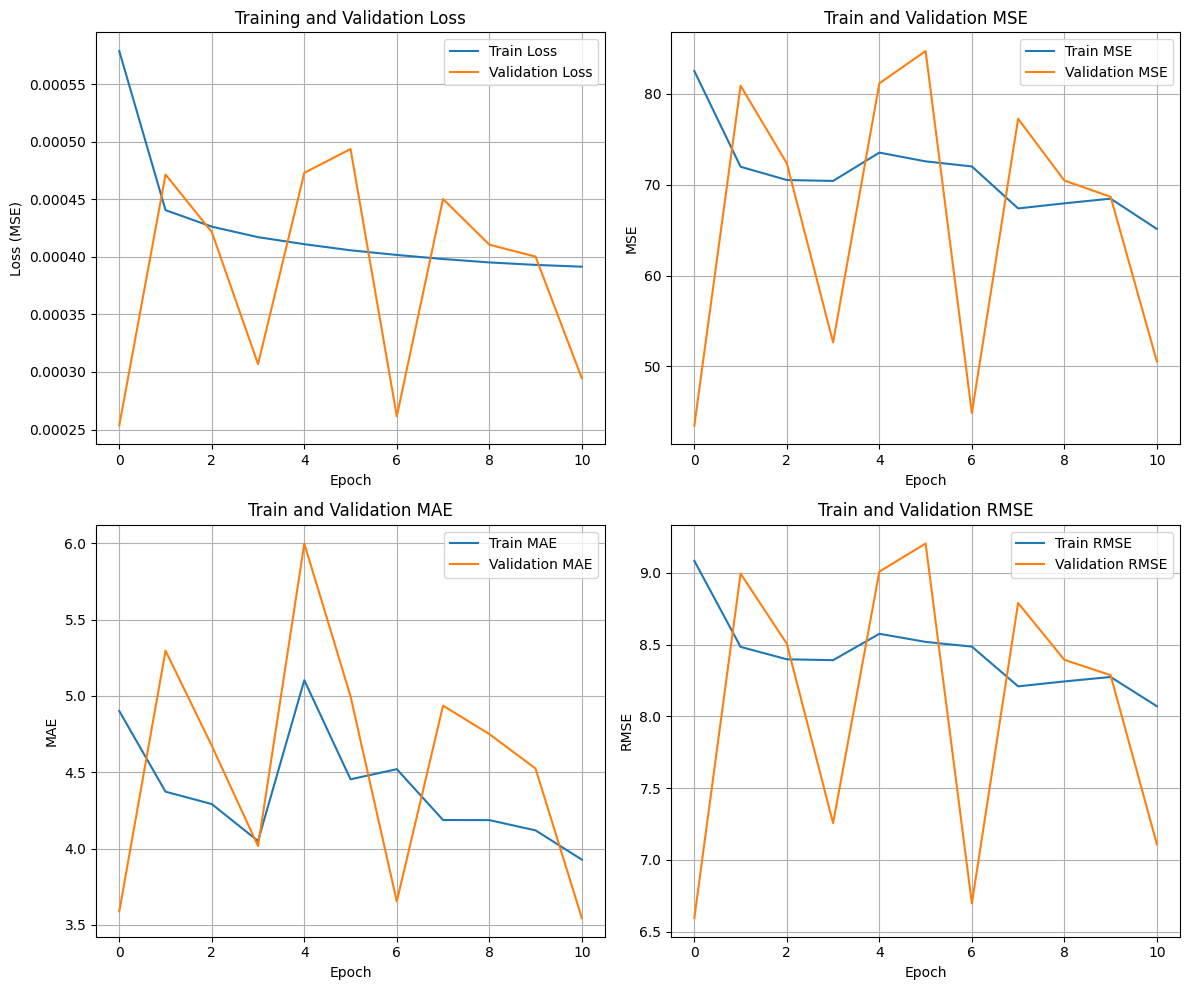

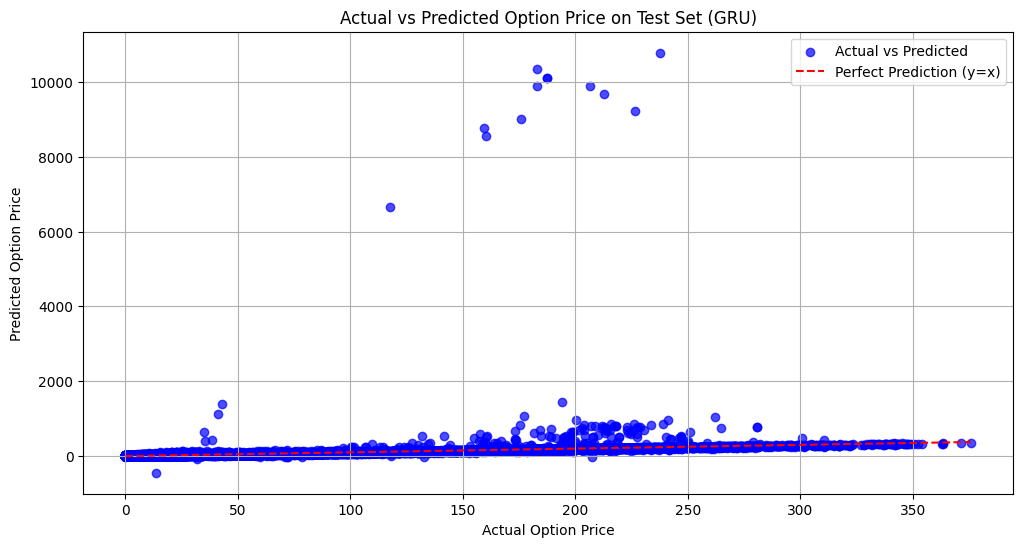

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping, Callback
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Custom callback to track metrics
class MetricsCallback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val, scaler_y):
        super(MetricsCallback, self).__init__()
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.scaler_y = scaler_y
        self.train_mse = []
        self.train_mae = []
        self.train_rmse = []
        self.val_mse = []
        self.val_mae = []
        self.val_rmse = []

    def on_epoch_end(self, epoch, logs=None):
        y_train_pred = self.model.predict(self.X_train, verbose=0)
        y_val_pred = self.model.predict(self.X_val, verbose=0)

        y_train_true = self.scaler_y.inverse_transform(self.y_train)
        y_train_pred = self.scaler_y.inverse_transform(y_train_pred)
        y_val_true = self.scaler_y.inverse_transform(self.y_val)
        y_val_pred = self.scaler_y.inverse_transform(y_val_pred)

        train_mse = mean_squared_error(y_train_true, y_train_pred)
        train_mae = mean_absolute_error(y_train_true, y_train_pred)
        train_rmse = np.sqrt(train_mse)

        val_mse = mean_squared_error(y_val_true, y_val_pred)
        val_mae = mean_absolute_error(y_val_true, y_val_pred)
        val_rmse = np.sqrt(val_mse)

        self.train_mse.append(train_mse)
        self.train_mae.append(train_mae)
        self.train_rmse.append(train_rmse)
        self.val_mse.append(val_mse)
        self.val_mae.append(val_mae)
        self.val_rmse.append(val_rmse)

        print(f'Epoch {epoch+1}:')
        print(f'  Train MSE: {train_mse:.4f}, MAE: {train_mae:.4f}, RMSE: {train_rmse:.4f}')
        print(f'  Val MSE: {val_mse:.4f}, MAE: {val_mae:.4f}, RMSE: {val_rmse:.4f}')

# Build GRU model
model = Sequential()
model.add(GRU(256, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True))
model.add(GRU(128, activation='relu', return_sequences=False))
model.add(Dense(1))

# Compile with MSE loss
model.compile(optimizer='adam', loss='mse')  # Using MSE as loss, since RMSE is sqrt(MSE)

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
metrics_callback = MetricsCallback(X_train, y_train, X_val, y_val, scaler_y)

# Train model
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(X_val, y_val), callbacks=[early_stop, metrics_callback], verbose=1)

# Evaluate on test set
y_pred = model.predict(X_test)

y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

gru_mse_call = mean_squared_error(y_test_inv, y_pred_inv)
gru_mae_call = mean_absolute_error(y_test_inv, y_pred_inv)
gru_rmse_call = np.sqrt(gru_mse_call)

print(f'MSE on test set: {gru_mse_call:.4f}')
print(f'MAE on test set: {gru_mae_call:.4f}')
print(f'RMSE on test set: {gru_rmse_call:.4f}')


# Save model weights
model.save_weights('gru_call_price_model.weights.h5')

import matplotlib.pyplot as plt

# Plot training and validation metrics
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Subplot 1: Training and Validation Loss
axs[0, 0].plot(history.history['loss'], label='Train Loss')
axs[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axs[0, 0].set_title('Training and Validation Loss')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('Loss (MSE)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Subplot 2: MSE over Epochs
axs[0, 1].plot(metrics_callback.train_mse, label='Train MSE')
axs[0, 1].plot(metrics_callback.val_mse, label='Validation MSE')
axs[0, 1].set_title('Train and Validation MSE')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Subplot 3: MAE over Epochs
axs[1, 0].plot(metrics_callback.train_mae, label='Train MAE')
axs[1, 0].plot(metrics_callback.val_mae, label='Validation MAE')
axs[1, 0].set_title('Train and Validation MAE')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('MAE')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Subplot 4: RMSE over Epochs
axs[1, 1].plot(metrics_callback.train_rmse, label='Train RMSE')
axs[1, 1].plot(metrics_callback.val_rmse, label='Validation RMSE')
axs[1, 1].set_title('Train and Validation RMSE')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()  # Display the 2x2 subplots

# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test_inv, y_pred_inv, alpha=0.7, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], 'r--', label='Perfect Prediction (y=x)')
plt.title('Actual vs Predicted Option Price on Test Set (GRU)')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.legend()
plt.grid(True)
plt.show()  # Display the scatter plot